# **Company_Dataset**

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [44]:
company=pd.read_csv('Company_Data.csv')

In [45]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [46]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [47]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [48]:
company.shape

(400, 11)

In [49]:
#categorical_features

categorical_features = [feature for feature in company.columns if company[feature].dtypes == 'O']
print('categorical_features:', categorical_features)

categorical_features: ['ShelveLoc', 'Urban', 'US']


In [50]:
#numerical_features

numeric_features = [feature for feature in company.columns if company[feature].dtypes != 'O']
print('numeric features:', numeric_features, '\n')

numeric features: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'] 



# **Preprocessing**

In [51]:
company['sales']=np.where((company['Sales']<9),'low','high')
company=company.drop(columns=['Sales'])

In [52]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,141,64,3,340,128,Bad,38,13,Yes,No,low


In [53]:
company.sales.value_counts()

low     286
high    114
Name: sales, dtype: int64

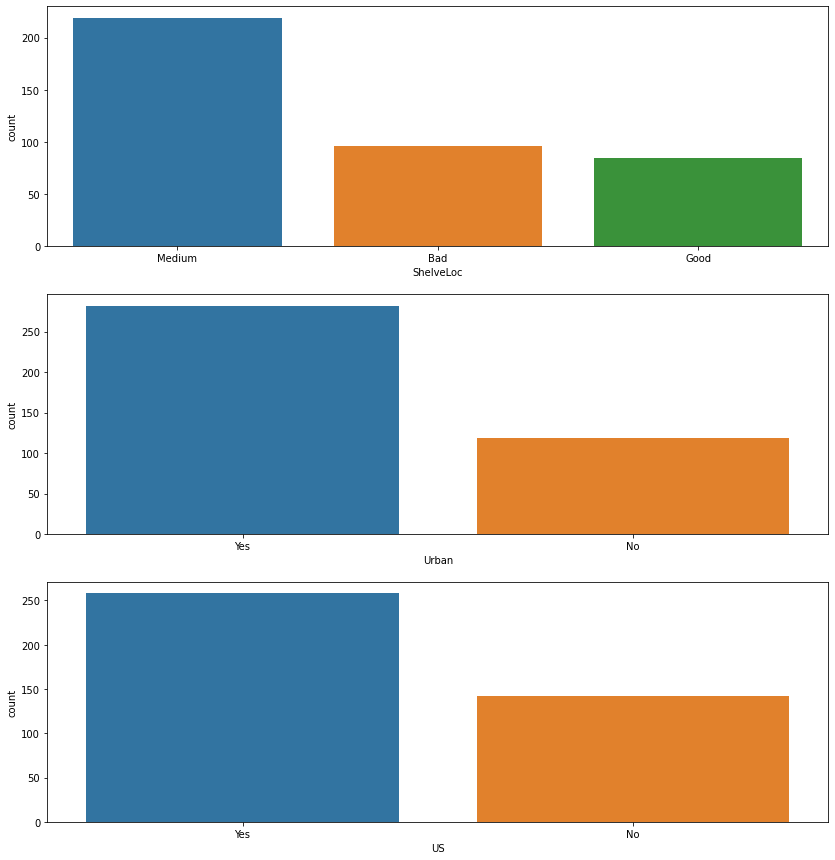

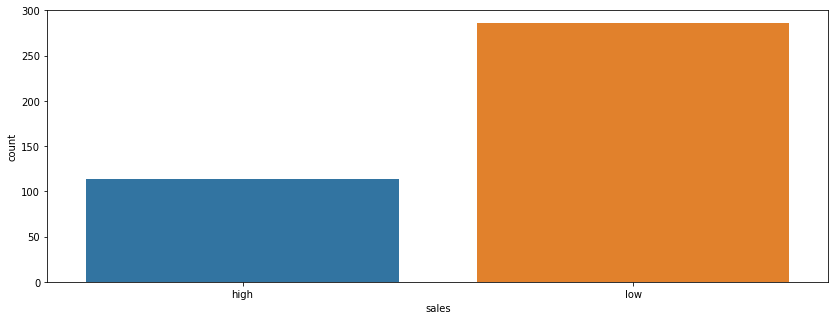

In [54]:
# barplot
fig, axes=plt.subplots(len(categorical_features),1,figsize=(14,15))

for i in range (0, len(categorical_features)):
    sns.countplot(company[categorical_features[i]],ax=axes[i], order=company[categorical_features[i]].value_counts().index)

plt.figure(figsize=(14,5))
sns.countplot(company['sales'])

In [62]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
company['sales']=labelencoder.fit_transform(company['sales'])
company['ShelveLoc']=labelencoder.fit_transform(company['ShelveLoc'])
company['Urban']=labelencoder.fit_transform(company['Urban'])
company['US']=labelencoder.fit_transform(company['US'])

In [63]:
x=company.drop('sales',axis=1)
y=company['sales']

In [64]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
model=RandomForestClassifier(n_estimators=50,max_features=4)
results=cross_val_score(model,x,y,cv=kfold)

In [65]:
# ACCURACY
print(results.mean())

0.835


# **Fraud_check Dataset**

In [66]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [67]:
#Loading dataset
data = pd.read_csv('Fraud_check.csv')
data.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [68]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [70]:
# Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

data1 = data.copy()

list = []
for i in range (0, len(data)):
    if data['Taxable.Income'][i] <= 30000:
        list.append('Risky')
    elif data['Taxable.Income'][i] > 30000:
        list.append('Good')

data1['loan_asset_type'] = list

data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,loan_asset_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


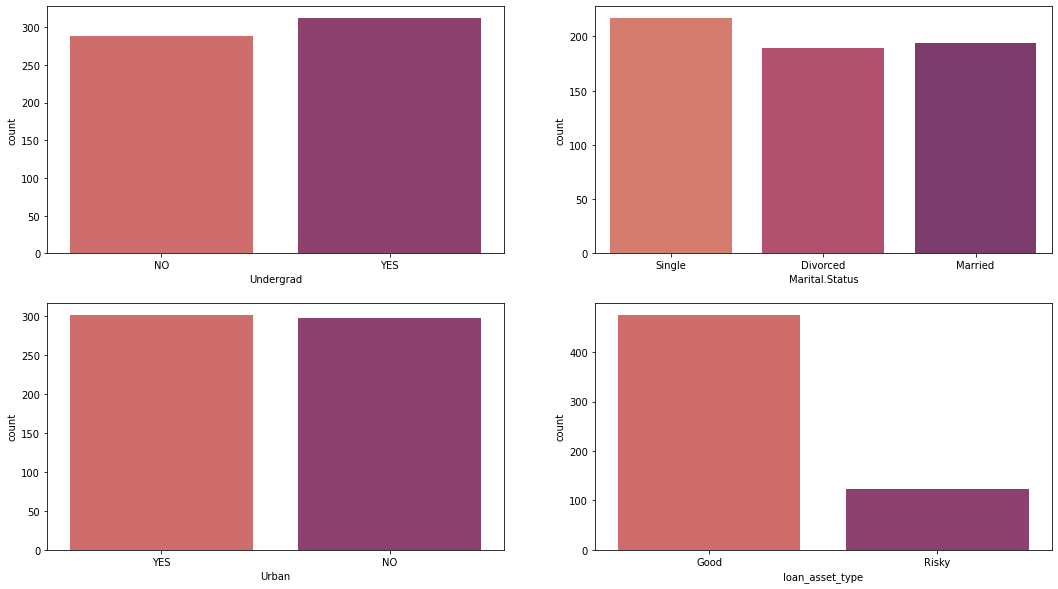

In [71]:
#countplot for categorical variables
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(data1['Undergrad'], palette='flare')
plt.subplot(2,2,2)
sns.countplot(data1['Marital.Status'], palette='flare')

plt.subplot(2,2,3)
sns.countplot(data1['Urban'], palette='flare')
plt.subplot(2,2,4)
sns.countplot(data1['loan_asset_type'], palette='flare')

plt.show()

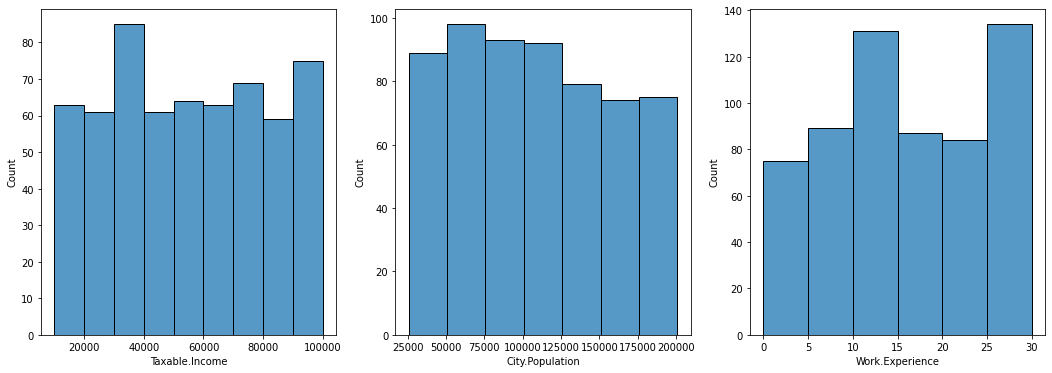

In [72]:
#Histogram for continuous variables

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.histplot(data1['Taxable.Income'], bins=range(min(data1['Taxable.Income']), max(data1['Taxable.Income']) + 10000, 10000))

plt.subplot(1,3,2)
sns.histplot(data1['City.Population'], bins=range(min(data1['City.Population']), max(data1['City.Population']) + 25000, 25000))

plt.subplot(1,3,3)
sns.histplot(data1['Work.Experience'], bins=range(min(data1['Work.Experience']), max(data1['Work.Experience']) + 5, 5) ) 

plt.show()


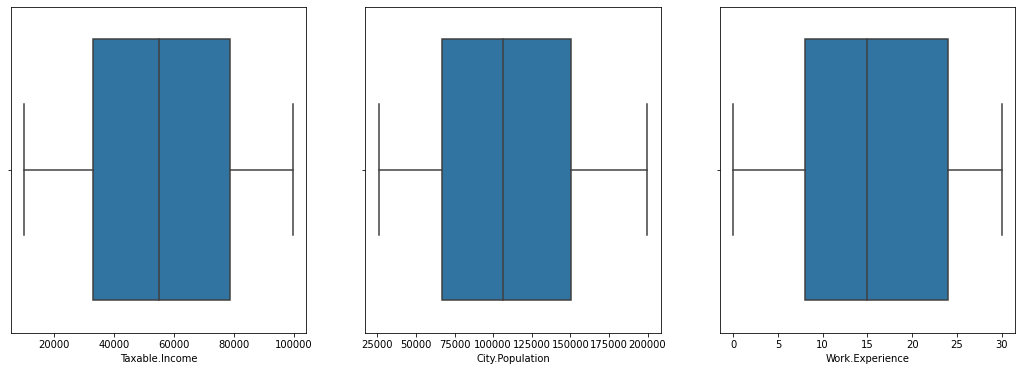

In [73]:
# Box plot for outlier detection
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(data1['Taxable.Income'])

plt.subplot(1,3,2)
sns.boxplot(data1['City.Population'])

plt.subplot(1,3,3)
sns.boxplot(data1['Work.Experience'] ) 

plt.show()


In [74]:
loan_asset_risky=pd.DataFrame()
loan_asset_good=pd.DataFrame()

loan_asset_risky = data1.loc[data1['loan_asset_type']=='Risky']

loan_asset_good = data1.loc[data1['loan_asset_type']=='Good']

In [75]:
data2 = data1.copy()
data2 = data2.rename(columns={'Undergrad':'undergrad' , 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income', 'City.Population':'city_population', 'Work.Experience': 'workxp', 'Urban':'urban'})
data2.drop('taxable_income', axis=1, inplace=True)

In [76]:
data2.head()

,undergrad,marital_status,city_population,workxp,urban,loan_asset_type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [77]:
data2.loan_asset_type.value_counts()

Good     476
Risky    124
Name: loan_asset_type, dtype: int64

In [78]:
x = data2.drop('loan_asset_type', axis=1)
y = data2['loan_asset_type']

In [79]:
x = pd.get_dummies(x) # encoding input categorical variables


le = LabelEncoder()
y = le.fit_transform(y) # encoding output categorical variables

In [80]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (480, 9)
Shape of X_test:  (120, 9)
Shape of y_train:  (480,)
Shape of y_test (120,)


In [82]:
num_trees = 100
max_features = 3

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)

print('Batchwise accuracy is:', '\n', results,'\n')
print('Overall accuracy is:', results.mean())

Batchwise accuracy is: 
 [0.76666667 0.7        0.83333333 0.88333333 0.71666667 0.66666667
 0.68333333 0.61666667 0.8        0.78333333] 

Overall accuracy is: 0.745


In [83]:
#Grid search for hyper parameter tuning
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

param_dict = { 
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]   
}

rf = RandomForestClassifier(random_state=7)

grid = GridSearchCV(rf, param_grid=param_dict, cv=kfold)
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100, 125, 150]})

In [84]:
print(grid.best_score_)
print(grid.best_params_)

0.7933333333333332
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 10}


In [85]:
#Building final model on grid.best_params_ parameters

model_kf =grid.best_estimator_
model_kf.fit(x, y)

results = cross_val_score(model_kf, x, y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3))

Accuracy with k fold validation 0.793


In [86]:
model = grid.best_estimator_ 
model.fit(x_train, y_train)

pred=model.predict(x_test)
print('Accuracy with train test split:', accuracy_score(y_test, pred))


Accuracy with train test split: 0.7666666666666667


In [87]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



In [88]:
confusion_matrix(y_test, pred)


array([[92,  0],
       [28,  0]])